# Linear models: Support Vector Machines (SVM)

In this notebook we are going to explore linear models and Support Vector Machines (SVM in short).

Let's first import the required packages.

In [2]:
#put here your ``numero di matricola''
numero_di_matricola = 7

from sklearn import datasets, preprocessing, linear_model, svm
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## SVM for linearly separable data

Let's start by creating a simple linearly separable dataset for binary classification, where the instance space is $\mathcal{X} =\mathbb{R}^2$ (so that we can visualize it). Just to make things easier, we are going to rescale it too.

In [3]:
X, y = datasets.make_blobs(n_samples = 500, centers = 2, n_features = 2, random_state=numero_di_matricola)

scaler = preprocessing.StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

The following code plots the dataset, it is useful for later parts too.

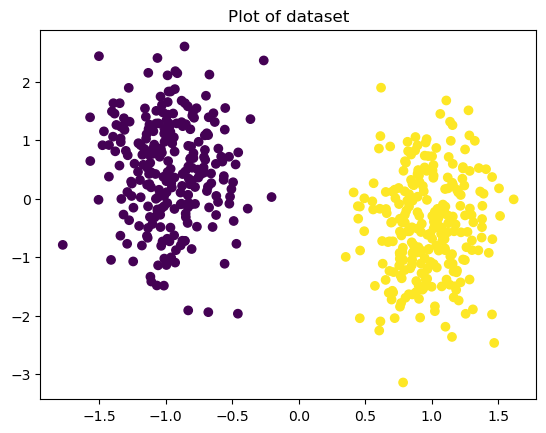

In [4]:
plt.title("Plot of dataset")
plt.scatter(X[:, 0], X[:, 1], c=y)

Now let's run the perceptron, using $\texttt{linear\_model.Perceptron(...)}$ from sklearn. We fix the number of iterations to 100 so that it runs quickly, and $\texttt{random\_state=10}$.

What do we expect in terms of training error? 

In [5]:
#Create a perceptron classifier
# TO DO: COMPLETE
model_perceptron_1 = linear_model.Perceptron( max_iter = 100, random_state = 10 )


#Training the model
# TO DO: COMPLETE
model_perceptron_1.fit(X , y)


#Get the training error as 1 - score()
# TO DO: COMPLETE
training_error = 1-model_perceptron_1.score(X,y)


#Print the training error
# TO DO: COMPLETE
print("Training error: ", training_error)


Training error:  0.0


The following code plots the *decision boundary* of a model and the training set. It is useful for later parts too.

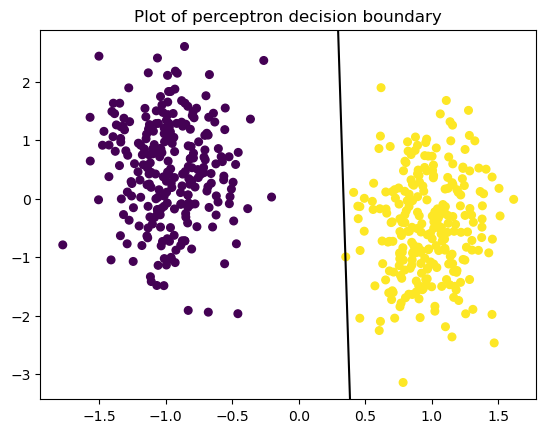

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30)
ax = plt.gca()
plt.title("Plot of perceptron decision boundary")
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
# use the decision_function call to obtain the boundary to be plot.
# TO DO

Z = model_perceptron_1.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=1,
linestyles=['-'])

If we change the value of $\texttt{random\_state}$ in the perceptron, it will start from a different model. 

Let's run the perceptron with $\texttt{random\_state}=$. How will the solution compare to the above?

In [7]:
#Create a perceptron classifier
# TO DO: COMPLETE
model_perceptron_2 = linear_model.Perceptron( max_iter = 100, random_state = 12 )


#Training the model
# TO DO: COMPLETE
model_perceptron_2.fit(X , y)


#Get the training error as 1 - score()
# TO DO: COMPLETE
training_error = 1-model_perceptron_2.score(X,y)


#Print the training error
# TO DO: COMPLETE
print("Training error: ", training_error)


Training error:  0.0


What about the decision boundary? Let's plot it.

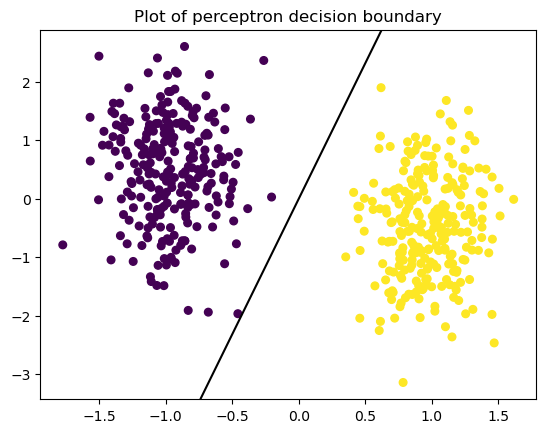

In [8]:
# TO DO: WRITE THE CODE TO PLOT THE DECISION BOUNDARY
plt.scatter(X[:, 0], X[:, 1], c=y, s=30)
ax = plt.gca()
plt.title("Plot of perceptron decision boundary")
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
# use the decision_function call to obtain the boundary to be plot.
# TO DO

Z = model_perceptron_2.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=1,
linestyles=['-'])


Which model is better? 

Is any of these the *best* choice?

Now, let's run the hard-SVM on the same data. To obtain (an almost) hard-SVM in sklearn, we can use $\texttt{svm.SVC(...)}$ with a very high value of the parameter $C$.

In [9]:
#Creating a SVM model
# TO DO: COMPLETE
model_svm = svm.SVC(kernel="linear", C=100000000)

#Training the model
# TO DO: COMPLETE
model_svm.fit(X,y)


#Get the training error as 1 - score()
# TO DO: COMPLETE
training_error = 1 - model_svm.score(X,y)

#Print the training error
# TO DO: COMPLETE
print("training error: ", training_error)

training error:  0.0


Plot the SVM decision boundary.

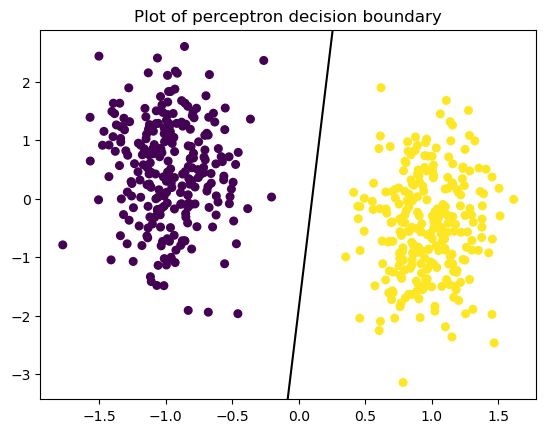

In [10]:
# TO DO: WRITE THE CODE TO PLOT THE DECISION BOUNDARY
plt.scatter(X[:, 0], X[:, 1], c=y, s=30)
ax = plt.gca()
plt.title("Plot of perceptron decision boundary")
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
# use the decision_function call to obtain the boundary to be plot.
# TO DO

Z = model_svm.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=1,
linestyles=['-'])



Let's see what the support vectors are. They are defined in attribute support_vectors_

In [11]:
#print the support vectors (attribute support)
#TO DO: COMPLETE
print(model_svm.support_vectors_)

print(model_svm.dual_coef_)

[[-0.20498378  0.02693208]
 [ 0.35281708 -0.99697609]
 [ 0.41207829  0.10634759]]
[[-5.34267604  0.54301766  4.79965837]]


Let's what happens moving one support vector. We first obtain the indices of the support vectors.

In [12]:
#print the indices of support vectors (attribute support)
print(model_svm.support_)


[321 109 417]


Now let's move one support vector closer to the points in the same class.

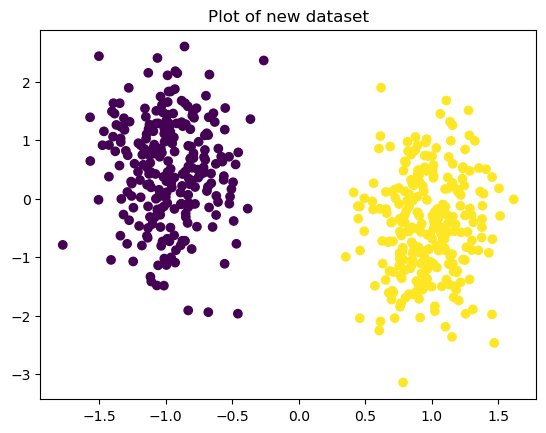

In [13]:
#let's copy the data and maove one support vector close to the points in the same class
X1 = X.copy()
X1[321,0]=-1

#let's plot the new dataset
#TO DO: COMPLETE
plt.title("Plot of new dataset")
plt.scatter(X1[:,0], X1[:,1], c=y)

Let's run the SVM on the new data.

In [14]:
#Creating a SVM model
# TO DO: COMPLETE
model_svm_1 = svm.SVC(kernel="linear", C=100000000)

#Training the model
# TO DO: COMPLETE
model_svm_1.fit(X1,y)


#Get the training error as 1 - score()
# TO DO: COMPLETE
training_error = 1 - model_svm_1.score(X,y)

#Print the training error
# TO DO: COMPLETE
print("training error: ", training_error)

training error:  0.0


Plot the SVM decision boundary and the previous decision boundary.

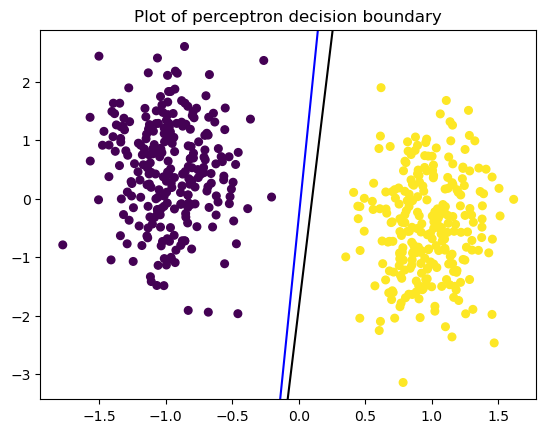

In [15]:
#TO DO: complete
# TO DO: WRITE THE CODE TO PLOT THE DECISION BOUNDARY
plt.scatter(X[:, 0], X[:, 1], c=y, s=30)
ax = plt.gca()
plt.title("Plot of perceptron decision boundary")
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
# use the decision_function call to obtain the boundary to be plot.
# TO DO

Z1 = model_svm_1.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=1,
linestyles=['-'])
ax.contour(XX, YY, Z1, colors='b', levels=[0], alpha=1,
linestyles=['-'])


Now let's move one support vector closer to the points in the otherr class.

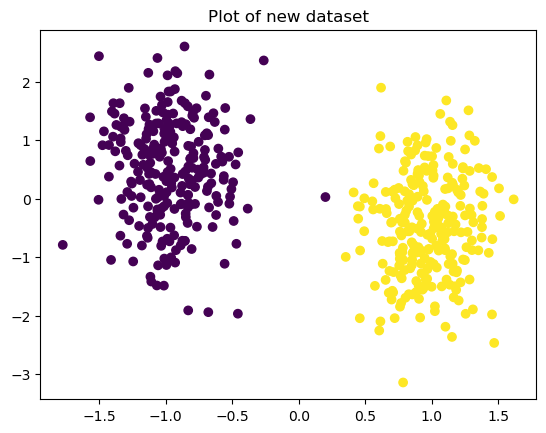

In [16]:
#let's copy the data and maove one support vector close to the points in the same class
X2 = X.copy()
X2[321,0]=0.2

#let's plot the new dataset
#TO DO: COMPLETE
plt.title("Plot of new dataset")
plt.scatter(X2[:,0], X2[:,1], c=y)

Let's run the SVM on the new data.

In [17]:
#Creating a SVM model
# TO DO: COMPLETE
model_svm_2 = svm.SVC(kernel="linear", C=100000000)

#Training the model
# TO DO: COMPLETE
model_svm_2.fit(X2,y)


#Get the training error as 1 - score()
# TO DO: COMPLETE
training_error = 1 - model_svm_2.score(X2,y)

#Print the training error
# TO DO: COMPLETE
print("training error: ", training_error)

training error:  0.0


Let's plot the new decision boundary, and the old ones too.

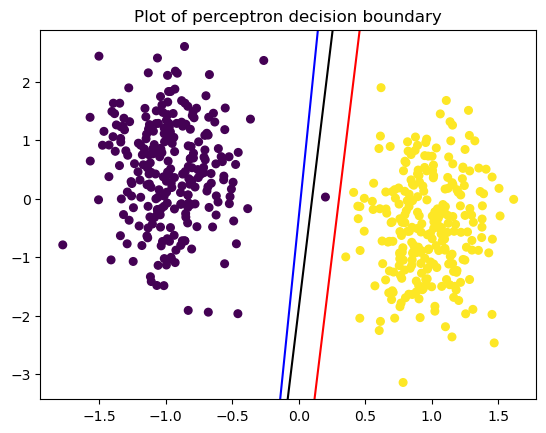

In [18]:
#TO DO: complete
# TO DO: WRITE THE CODE TO PLOT THE DECISION BOUNDARY
plt.scatter(X2[:, 0], X2[:, 1], c=y, s=30)
ax = plt.gca()
plt.title("Plot of perceptron decision boundary")
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
# use the decision_function call to obtain the boundary to be plot.
# TO DO

Z2 = model_svm_2.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=1,
linestyles=['-'])
ax.contour(XX, YY, Z1, colors='b', levels=[0], alpha=1,
linestyles=['-'])
ax.contour(XX, YY, Z2, colors='r', levels=[0], alpha=1,
linestyles=['-'])


## SVM for non-linearly separable data

Let's make a dataset that is not linearly separble, and let's plot it.

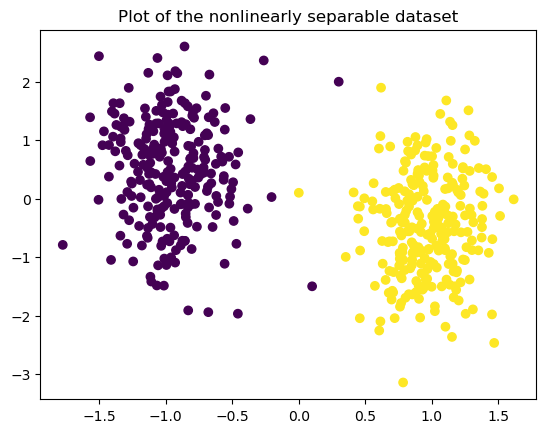

In [19]:
# TO DO: COMPLETE
X_nls, y_nls = datasets.make_blobs(n_samples = 500, centers = 2, n_features=2, random_state = numero_di_matricola)

scaler.fit(X_nls)
X_nls = scaler.transform(X_nls)

a = np.array([[0.3, 2]])
b= np.array([0])
X_nls = np.concatenate((X_nls, a))
y_nls = np.concatenate((y_nls, b))

a = np.array([[0.1, -1.5]])
b= np.array([0])
X_nls = np.concatenate((X_nls, a))
y_nls = np.concatenate((y_nls, b))

a = np.array([[0, 0.1]])
b= np.array([1])
X_nls = np.concatenate((X_nls, a))
y_nls = np.concatenate((y_nls, b))

plt.title("Plot of the nonlinearly separable dataset")
plt.scatter(X_nls[:, 0], X_nls[:,1], c=y_nls)

Let's try to learn a hard-SVM. It means that the parameter C, which is approximately equal to $1/\lambda$ with $\lambda$ as in our slides.

In [36]:
#Creating a hard SVM model
# TO DO: COMPLETE
model_hard_svm = svm.SVC(kernel="linear",C=100000000)

#Training the model
# TO DO: COMPLETE
model_hard_svm.fit(X_nls, y_nls)

#Get the training error as 1 - score()
# TO DO: COMPLETE
training_error = 1-model_hard_svm.score(X_nls,y_nls)

#Print the training error
# TO DO: COMPLETE
print("Training error: ", training_error)

Training error:  0.001988071570576566


The following code plots the decision boundary, as well as the margin.

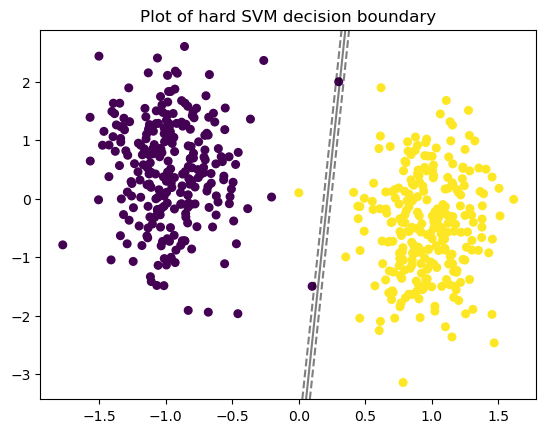

In [54]:
plt.scatter(X_nls[:, 0], X_nls[:, 1], c=y_nls, s=30)
ax = plt.gca()
plt.title("Plot of hard SVM decision boundary")
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

#TO DO: COMPLETE
Z = model_hard_svm.decision_function(xy).reshape(XX.shape)
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)

Let's try with a smaller value of C ($10^4$), that corresponds to larger value of $\lambda$.

What do you expect?

In [38]:
#Creating a hard SVM model
# TO DO: COMPLETE
model_hard_svm_2 = svm.SVC(kernel="linear",C=10000)

#Training the model
# TO DO: COMPLETE
model_hard_svm_2.fit(X_nls, y_nls)

#Get the training error as 1 - score()
# TO DO: COMPLETE
training_error = 1- model_hard_svm_2.score(X_nls,y_nls)

#Print the training error
# TO DO: COMPLETE
print("Training error: ", training_error)

Training error:  0.003976143141153132


What about the decision boundary and the margin?

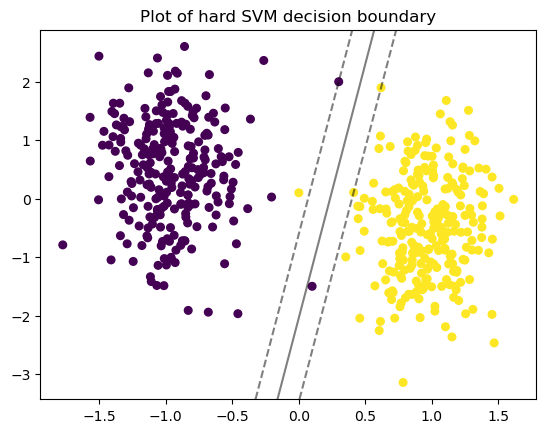

In [39]:
#TO DO: COMPLETE

plt.scatter(X_nls[:, 0], X_nls[:, 1], c=y_nls, s=30)
ax = plt.gca()
plt.title("Plot of hard SVM decision boundary")
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model_hard_svm_2.decision_function(xy).reshape(XX.shape)
# plot decision boundary and margins
#ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=1,
#linestyles=['-'])
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)

Let's repeat everything for C=100

In [40]:
#Creating a hard SVM model
# TO DO: COMPLETE
model_hard_svm_3 = svm.SVC(kernel="linear",C=100)

#Training the model
# TO DO: COMPLETE
model_hard_svm_3.fit(X_nls, y_nls)

#Get the training error as 1 - score()
# TO DO: COMPLETE
training_error = 1-model_hard_svm_3.score(X_nls,y_nls)

#Print the training error
# TO DO: COMPLETE
print("Training error: ", training_error)

Training error:  0.003976143141153132


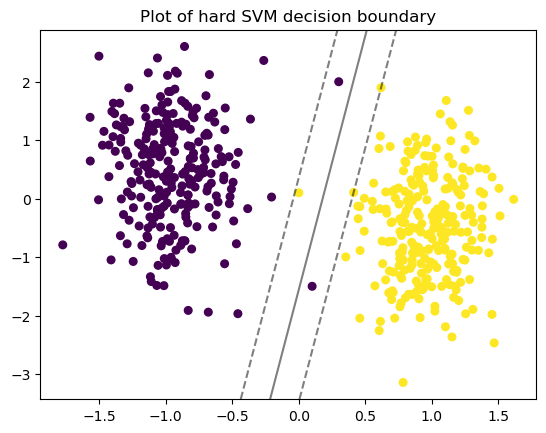

In [41]:
# TO DO: COMPLETE

plt.scatter(X_nls[:, 0], X_nls[:, 1], c=y_nls, s=30)
ax = plt.gca()
plt.title("Plot of hard SVM decision boundary")
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model_hard_svm_3.decision_function(xy).reshape(XX.shape)
# plot decision boundary and margins
#ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=1,
#linestyles=['-'])
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)

And for C=1?

In [73]:
#Creating a hard SVM model
# TO DO: COMPLETE
model_hard_svm_4 = svm.SVC(kernel="linear",C=0.0005)

#Training the model
# TO DO: COMPLETE
model_hard_svm_4.fit(X_nls, y_nls)

#Get the training error as 1 - score()
# TO DO: COMPLETE
training_error = 1- model_hard_svm_4.score(X_nls,y_nls)

#Print the training error
# TO DO: COMPLETE
print("Training error: ", training_error)

Training error:  0.41749502982107356


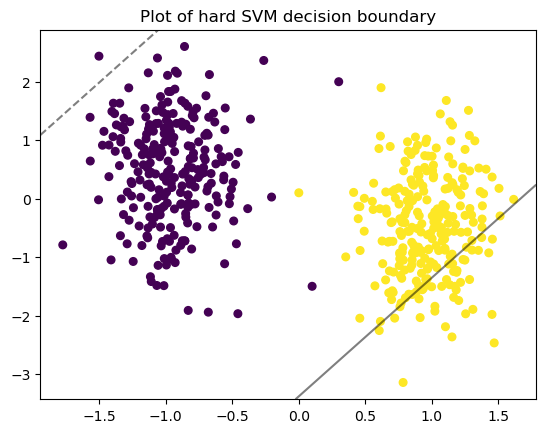

In [74]:
# TO DO: COMPLETE

plt.scatter(X_nls[:, 0], X_nls[:, 1], c=y_nls, s=30)
ax = plt.gca()
plt.title("Plot of hard SVM decision boundary")
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 10)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model_hard_svm_4.decision_function(xy).reshape(XX.shape)
# plot decision boundary and margins
#ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=1,
#linestyles=['-'])
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)

Let's see what are the support vectors.

In [44]:
#TO DO COMPLETE:
print(model_hard_svm_4.support_vectors_)

[[-0.38439002 -0.17140959]
 [-0.45836856 -1.96853588]
 [-0.20498378  0.02693208]
 [-0.2637712   2.36361175]
 [ 0.3         2.        ]
 [ 0.1        -1.5       ]
 [ 0.35281708 -0.99697609]
 [ 0.44659129 -0.34328506]
 [ 0.45899808 -0.13615956]
 [ 0.41207829  0.10634759]
 [ 0.44373116 -0.12888489]
 [ 0.          0.1       ]]


## My Understanding:

$\xi$ measures by how much the constraint $y_i(<w,x> + b) \geq 1$ is being violated 

When C is large ($C \to +\infty$) (i.e. $\lambda \to 0$), then $\xi \to 0$ (i.e. equal to Hard-SVM), then margin is small.

When C is small, then $\lambda \to +\infty$), then $w \to \vec{0}$, then $\xi$ is larger

Just for comparison, let's run the perceptron on the same dataset with various initial random states

In [32]:
#Create a perceptron classifier
# TO DO: COMPLETE
model_perceptron_nls = linear_model.Perceptron(max_iter=100, random_state = 0)

#Training the model
# TO DO: COMPLETE
model_perceptron_nls.fit(X_nls, y_nls)

#Get the training error as 1 - score()
# TO DO: COMPLETE
training_error = 1- model_perceptron_nls.score(X_nls,y_nls)

#Print the training error
# TO DO: COMPLETE
print("Training error: ", training_error)

Training error:  0.007952286282306154


Let's plot the decision boundary.

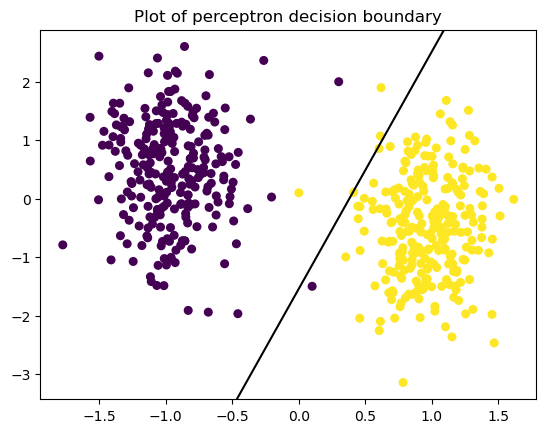

In [33]:
# TO DO: COMPLETE

plt.scatter(X_nls[:, 0], X_nls[:, 1], c=y_nls, s=30)
ax = plt.gca()
plt.title("Plot of perceptron decision boundary")
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model_perceptron_nls.decision_function(xy).reshape(XX.shape)
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=1,
linestyles=['-'])

Training error:  0.007952286282306154


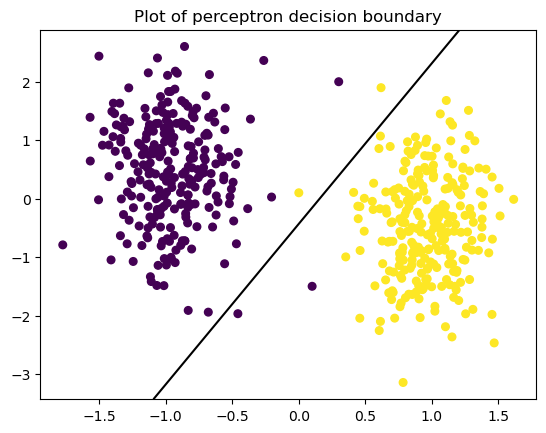

In [34]:
#Create a perceptron classifier
# TO DO: COMPLETE
model_perceptron_nls = linear_model.Perceptron(max_iter=100, random_state = 10)

#Training the model
# TO DO: COMPLETE
model_perceptron_nls.fit(X_nls, y_nls)

#Get the training error as 1 - score()
# TO DO: COMPLETE
training_error = 1- model_perceptron_nls.score(X_nls,y_nls)

#Print the training error
# TO DO: COMPLETE
print("Training error: ", training_error)

plt.scatter(X_nls[:, 0], X_nls[:, 1], c=y_nls, s=30)
ax = plt.gca()
plt.title("Plot of perceptron decision boundary")
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model_perceptron_nls.decision_function(xy).reshape(XX.shape)
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=1,
linestyles=['-'])

Training error:  0.017892644135188873


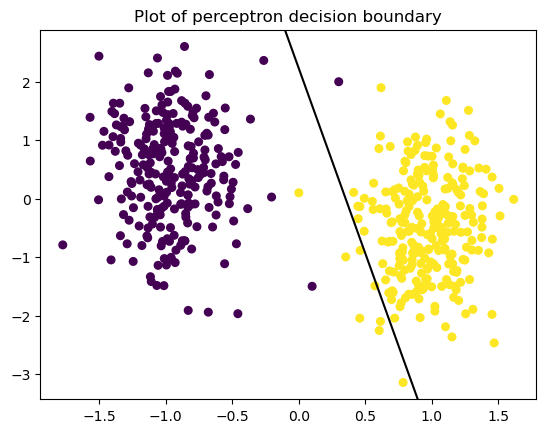

In [35]:
#Create a perceptron classifier
# TO DO: COMPLETE
model_perceptron_nls = linear_model.Perceptron(max_iter=100, random_state = 24)

#Training the model
# TO DO: COMPLETE
model_perceptron_nls.fit(X_nls, y_nls)

#Get the training error as 1 - score()
# TO DO: COMPLETE
training_error = 1- model_perceptron_nls.score(X_nls,y_nls)

#Print the training error
# TO DO: COMPLETE
print("Training error: ", training_error)

plt.scatter(X_nls[:, 0], X_nls[:, 1], c=y_nls, s=30)
ax = plt.gca()
plt.title("Plot of perceptron decision boundary")
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model_perceptron_nls.decision_function(xy).reshape(XX.shape)
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=1,
linestyles=['-'])